In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [68]:
#load data set
df = pd.read_csv("/Users/macbook/Desktop/internship/data/Mall.csv")

# Display dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (200, 5)

First 5 Rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [69]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [70]:
# Preprocessing
# Encode Gender feature
if df['Gender'].dtype == 'object':
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [71]:
# Select some features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

 ## Assignment: Exploratory Data Analysis

In [72]:
#3.Summary statistics
print("\nSummary statistics (numeric columns):")
print(df.describe())


Summary statistics (numeric columns):
       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.560000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    1.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000  


In [73]:
#4. Distributions
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns


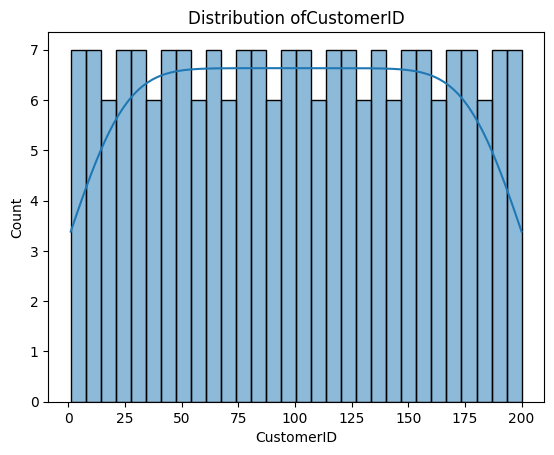

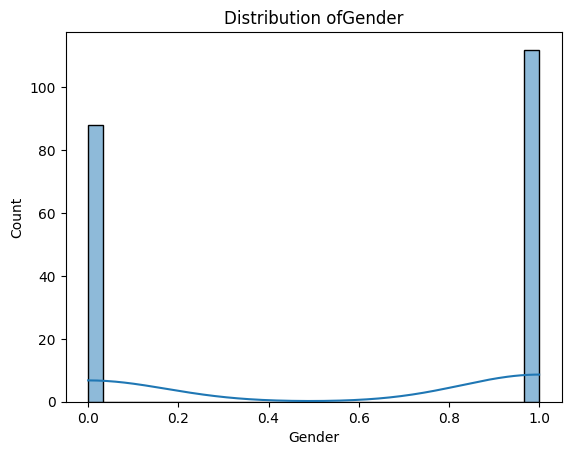

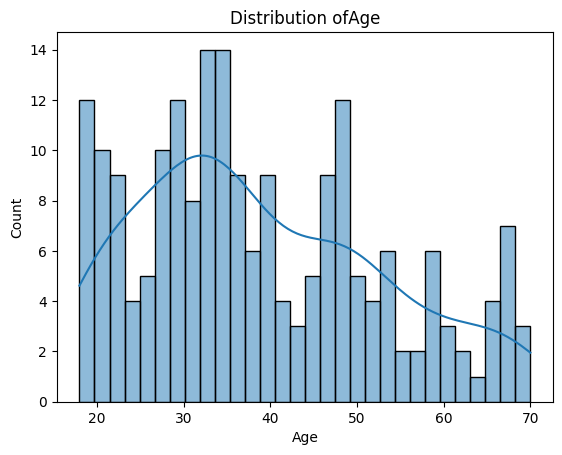

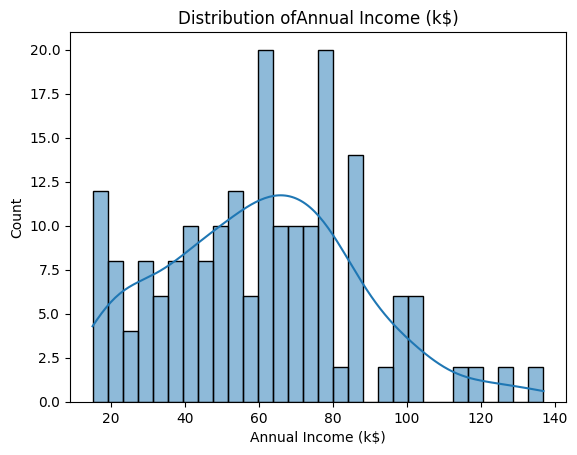

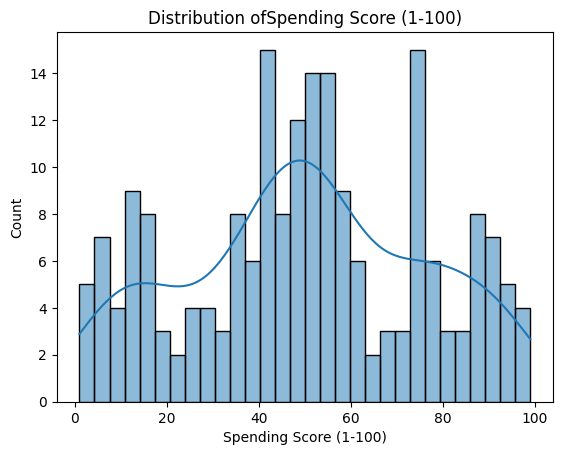

In [74]:
#Hisogram - numeric columns
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of{col}")
    plt.show()

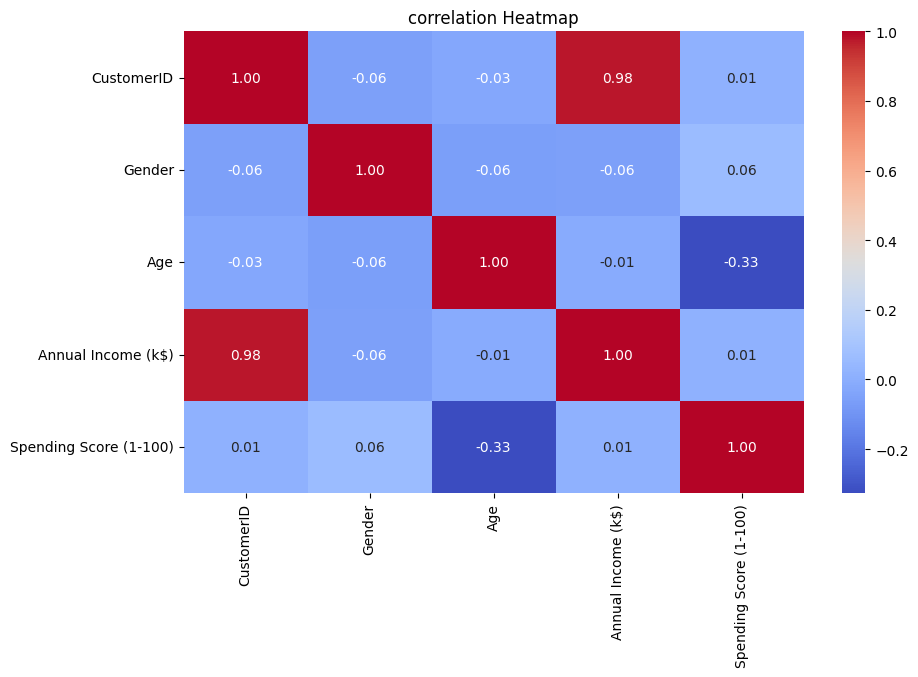

In [75]:
#5. Relationships between variables
# correlation heatmap
if len(numeric_cols) > 1:
    plt.figure(figsize=(10,6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("correlation Heatmap")
    plt.show()

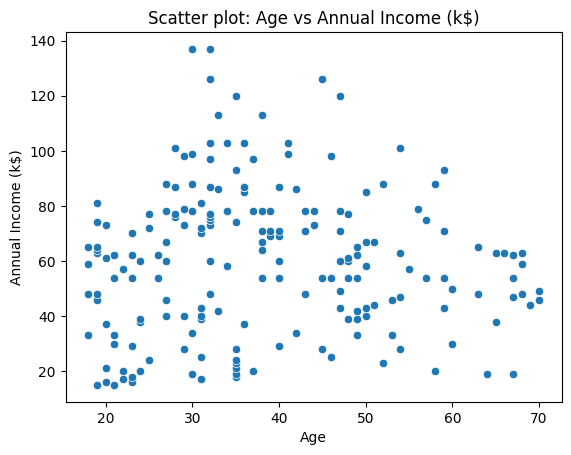

In [76]:

# Scatter plots for pairs (just first 2 numeric cols as example)
if len(numeric_cols) >= 2:
    plt.figure()
    sns.scatterplot(x=df[numeric_cols[2]], y=df[numeric_cols[3]])
    plt.title(f"Scatter plot: {numeric_cols[2]} vs {numeric_cols[3]}")
    plt.show()

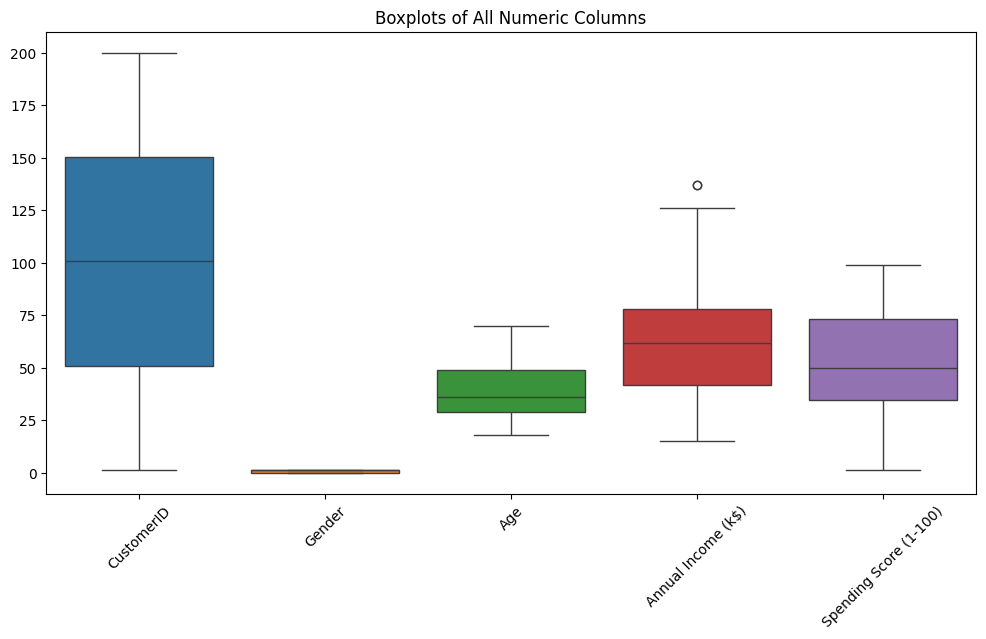

In [77]:
# 6. Outliers (boxplots for all numeric columns in one figure)
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of All Numeric Columns")
plt.xticks(rotation=45)  # rotate labels for readability
plt.show()

In [78]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

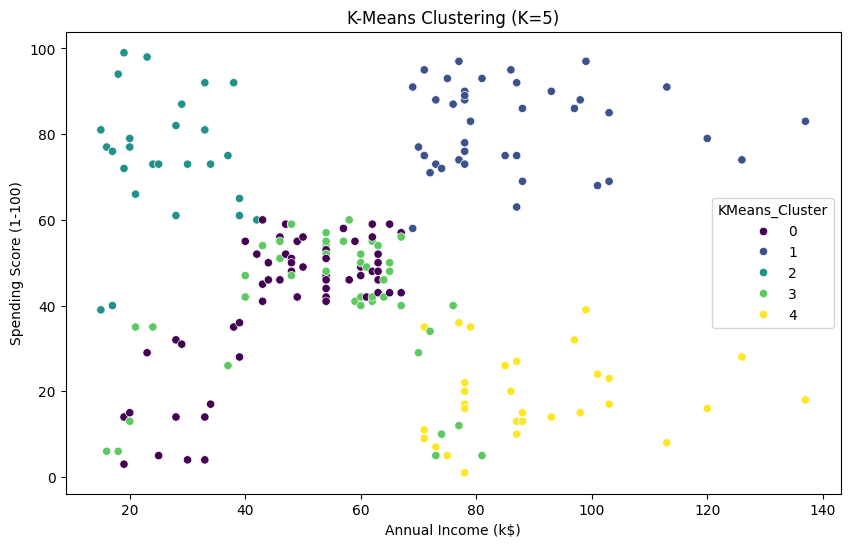

In [79]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

# Visualize K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering (K=5)')
plt.show()

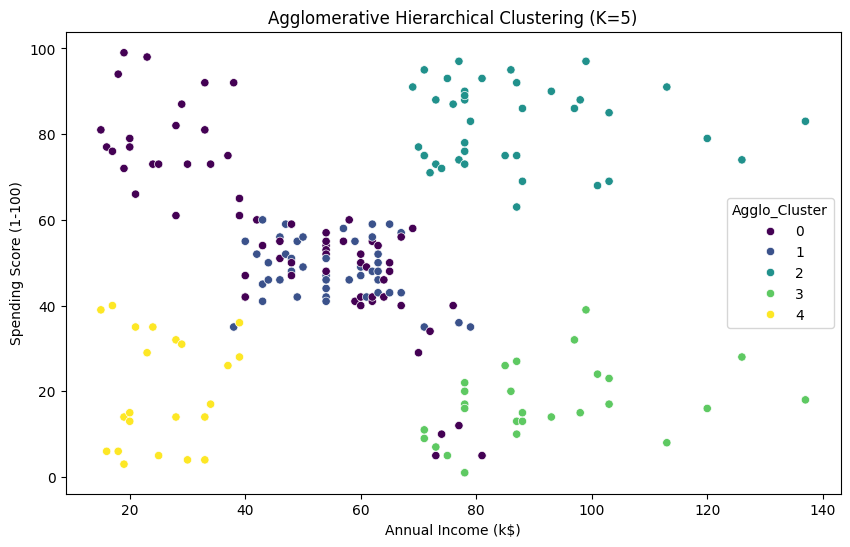

NameError: name 'resample' is not defined

In [85]:

# Hierarchical Clustering
# Perform Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agglo_Cluster', data=df, palette='viridis')
plt.title('Agglomerative Hierarchical Clustering (K=5)')
plt.show()

# Dendrogram for Hierarchical Clustering
df_sample = resample(df, n_samples=80, random_state=42)
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Sample of 80)")
plt.xlabel("Data Points (Sampled)")
plt.ylabel("Distance")
plt.show()

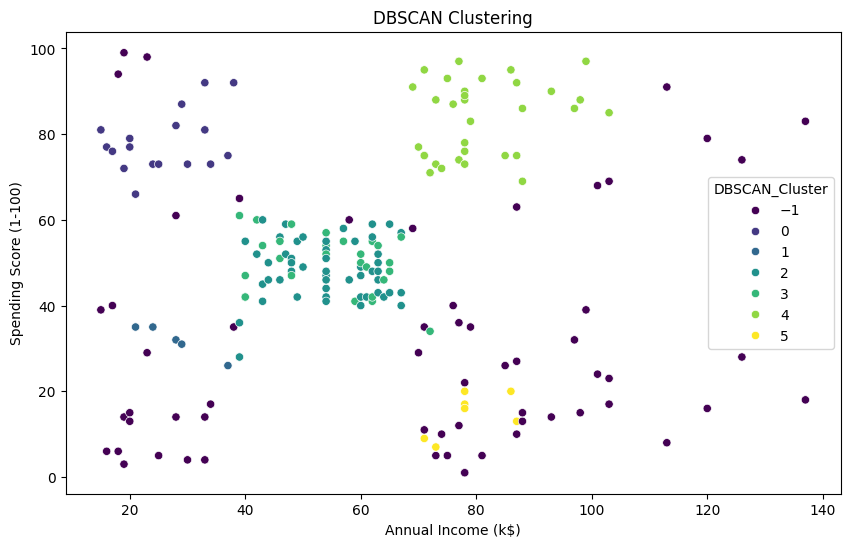

In [81]:
# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [82]:
# Evaluate Clustering Performance
print("\nK-Means Silhouette Score:", silhouette_score(X_scaled, kmeans.labels_))
print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, agglo.labels_))
print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, dbscan.labels_))

print("\nK-Means Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, kmeans.labels_))
print("Agglomerative Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, agglo.labels_))
print("DBSCAN Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, dbscan.labels_))

print("\nK-Means Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans.labels_))
print("Agglomerative Davies-Bouldin Index:", davies_bouldin_score(X_scaled, agglo.labels_))
print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(X_scaled, dbscan.labels_))



K-Means Silhouette Score: 0.40846873777345605
Agglomerative Silhouette Score: 0.39002826186267214
DBSCAN Silhouette Score: 0.18451372756506046

K-Means Calinski-Harabasz Index: 123.41870976849417
Agglomerative Calinski-Harabasz Index: 107.82656032570374
DBSCAN Calinski-Harabasz Index: 34.07053246361936

K-Means Davies-Bouldin Index: 0.8889693268899006
Agglomerative Davies-Bouldin Index: 0.9162886109753661
DBSCAN Davies-Bouldin Index: 1.7569458461701164


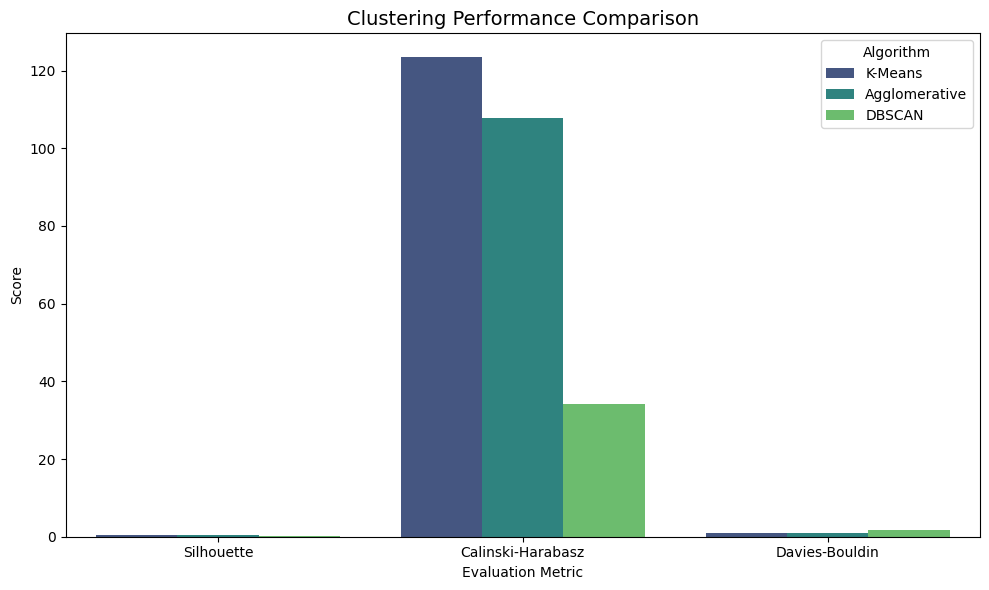

In [83]:
# Metric results
results = {
    "K-Means": {
        "Silhouette": 0.40846873777345605,
        "Calinski-Harabasz": 123.41870976849417,
        "Davies-Bouldin": 0.8889693268899006,
    },
    "Agglomerative": {
        "Silhouette": 0.39002826186267214,
        "Calinski-Harabasz": 107.82656032570374,
        "Davies-Bouldin": 0.9162886109753661,
    },
    "DBSCAN": {
        "Silhouette": 0.18451372756506046,
        "Calinski-Harabasz": 34.07053246361936,
        "Davies-Bouldin": 1.7569458461701164,
    }
}


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Score", hue="Algorithm", data=df_melted, palette="viridis")
plt.title("Clustering Performance Comparison", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Evaluation Metric")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.show()

/var/folders/qp/jnj6wwv54lv_p5tg2lly4ng00000gn/T/ipykernel_45358/2987338623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Algorithm", y=metric, data=df_results, ax=axes[i], palette="viridis")
/var/folders/qp/jnj6wwv54lv_p5tg2lly4ng00000gn/T/ipykernel_45358/2987338623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Algorithm", y=metric, data=df_results, ax=axes[i], palette="viridis")
/var/folders/qp/jnj6wwv54lv_p5tg2lly4ng00000gn/T/ipykernel_45358/2987338623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Algorithm", y=

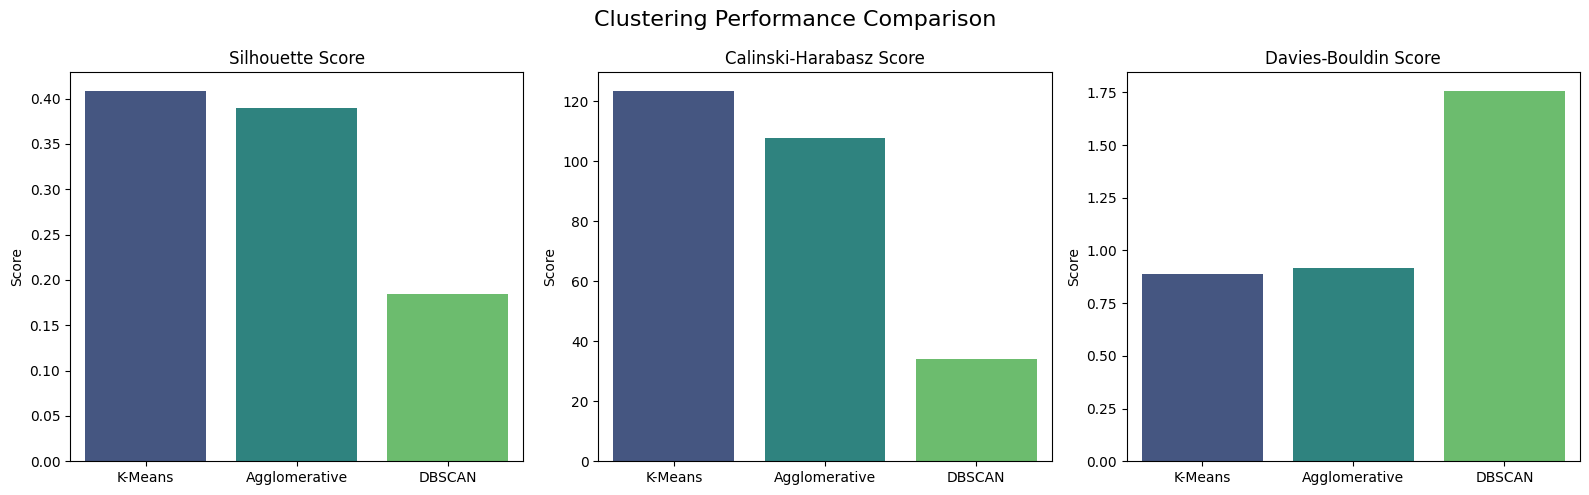

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics = ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]

for i, metric in enumerate(metrics):
    sns.barplot(x="Algorithm", y=metric, data=df_results, ax=axes[i], palette="viridis")
    axes[i].set_title(f"{metric} Score")
    axes[i].set_ylabel("Score")
    axes[i].set_xlabel("")

plt.suptitle("Clustering Performance Comparison", fontsize=16)
plt.tight_layout()
plt.show()